# Lab 04 : Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # find automatically the path of the folder containing "file_name" :
    file_name = 'train_vanilla_nn_exercise.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    #path_to_file = '/content/gdrive/My Drive/CS5242_2021_codes/codes/labs_lecture03/lab04_train_vanilla_nn'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
./gdrive/MyDrive/CS5242_2021_codes/codes/labs_lecture03/lab04_train_vanilla_nn/
/content/gdrive/MyDrive/CS5242_2021_codes/codes/labs_lecture03/lab04_train_vanilla_nn


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [3]:
from utils import check_fashion_mnist_dataset_exists
data_path=check_fashion_mnist_dataset_exists()

train_data=torch.load(data_path+'fashion-mnist/train_data.pt')
train_label=torch.load(data_path+'fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

FASHION-MNIST dataset missing - downloading...


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../../data/fashion-mnist/temp/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/fashion-mnist/temp/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [4]:
test_data=torch.load(data_path+'fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        # complete here
        self.linear_layer = nn.Linear(input_size, output_size, bias = True)
        
    def forward(self, x):
        
        x = self.linear_layer(x)# complete here
        p = torch.softmax(x, dim=1)# complete here
        
        return p

### Build the net

In [6]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=True)
)


### Take the 4th image of the test set:

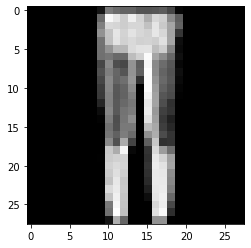

In [8]:
im= test_data[3]# complete here
utils.show(im)

### And feed it to the UNTRAINED network:

In [10]:
print(im.size())
p = net(im.view(1, 784))# complete here
print(p)

torch.Size([28, 28])
tensor([[0.1141, 0.0700, 0.1264, 0.0827, 0.1080, 0.1134, 0.1019, 0.0713, 0.1054,
         0.1068]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

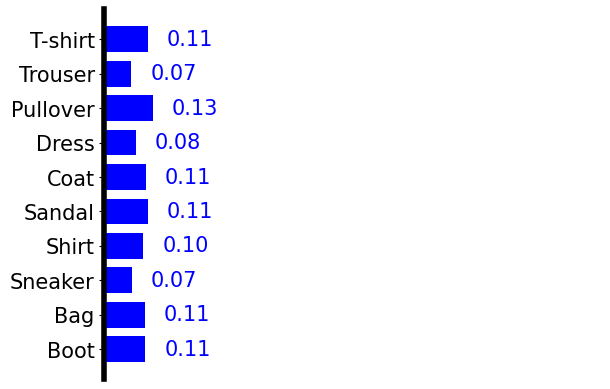

In [11]:
utils.show_prob_fashion_mnist(p)

In [15]:
print(train_label[0])
print(train_label[0].view(1))

tensor(9)
tensor([9])


### Train the network (only 5000 iterations) on the train set

In [21]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )
# 训练 5000 次
for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network

    # complete here
    # complete here
    # complete here
    # 防止 neural network 记住顺序，能提高 5% 的预测率
    idx = randint(0, 60000-1)
    input = train_data[idx].view(1, 784)
    # label 需要 dimension
    label = train_label[idx].view(1)


    # feed the input to the net  
    input.requires_grad_() # for backprobagation -- we will discuss it later
    # complete here
    prob = net(input)
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

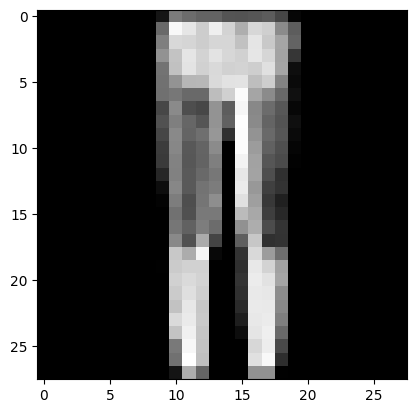

In [25]:
im= test_data[3]# complete here
utils.show(im)

### Feed it to the TRAINED net:

In [23]:
p = net(im.view(1, 784))# complete here
print(p)

tensor([[1.8632e-02, 1.7783e-03, 2.3617e-01, 1.2829e-02, 2.8700e-02, 1.7743e-03,
         6.9409e-01, 1.3615e-04, 3.0081e-03, 2.8846e-03]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

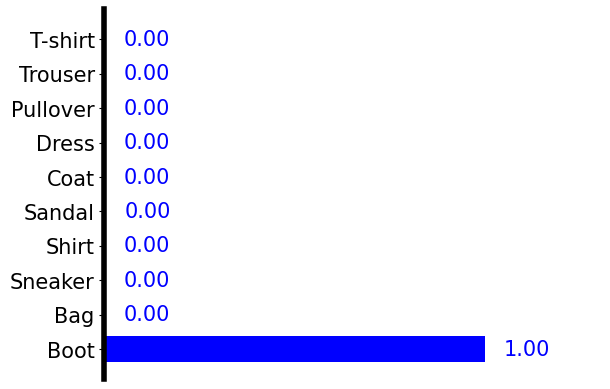

In [24]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

In [ ]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)